---
### 8.5.1 差分方程建模
核心：离散化
#### 1. 贷款问题
$$
\begin{align*}
当月欠款&=上月欠款的当月本息-当月还款\\
y_n&=(1+r)y_{n-1}-x
\end{align*}
$$

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
Q = 3e5         # 贷款总额
r = 0.051/12    # 月利率
N = 360         # 总月数 (还款期限)
x = np.round((1+r)**N*Q*r / ((1+r)**N - 1), 2)
print("每月还款：", x)
print("总还款额：", x*N)

每月还款： 1628.85
总还款额： 586386.0


#### 2. 再论美国人口增长模型

In [3]:
data = pd.read_excel('../../08第8章  常微分方程与差分方程/data8_13.xlsx', header=None).values
xx = data[1::2].flatten()
xx = xx[~np.isnan(xx)]
b = xx[1:]
A = np.vstack([xx[:-1], xx[:-1]**2]).T
a, b = np.linalg.pinv(A) @ b
r = (a - 1)/10
s = b/(-10*r)
print(f'{r = }\n{s = }')
xpred = a*xx[-1] + b*xx[-1]**2
print("2010预测值：", xpred)

r = 0.0209488856753123
s = 0.0019693850336271234
2010预测值： 307.68087053122684


#### 3. 目标跟踪问题
这里离散化体现得十分明显，通过循环来实现计算

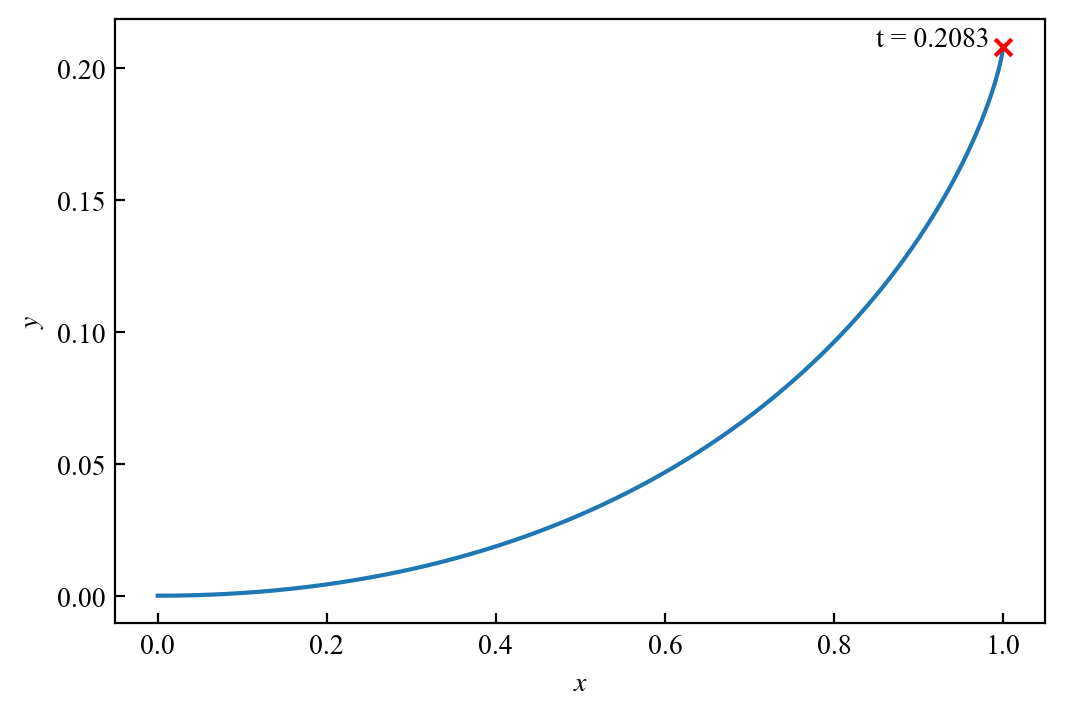

In [4]:
v = 1
u = 5*v
dt = 4e-5
x, y, t = 0, 0, 0
X, Y, T = [], [], []

while x <= 1-1e-5:
    PQ = np.array([1-x, v*t-y])
    PQ_len = np.linalg.norm(PQ)
    e1 = (PQ[0]) / PQ_len
    e2 = (PQ[1]) / PQ_len
    x += u*e1*dt
    y += u*e2*dt
    t += dt
    X.append(x)
    Y.append(y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y)
ax.scatter(X[-1], Y[-1], color='r', zorder=10, marker='x')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.text(X[-1]-0.15, Y[-1], f'{t = :.4f}')
fig.show()

### 8.5.2 差分方程的基本概念和理论
#### 1. 差分方程的解
#### 2. 差分方程的平衡点及稳定性
$n$ 阶线性常系数差分方程的平衡点稳定的充要条件是，对于其特征方程的根 $\lambda_i$，均有 $\left|\lambda_i\right|<1\ (i=1,2,\cdots,n)$